A decision tree is a class discriminator that recursively partitions the training set until each partition consists entirely or dominantly of examples from one class.
Each non-leaf node of the tree contains a split point that is a test on one or more attributes and determines how the data is partitioned.
The desicion tree is an algorithm that splits the the data sets few times. 
This algorithm tries to split the possible outcomes in order to predict a new datapoint where it will lie (in other words it will predict where the datapoint will stay, in which split).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [13]:
x = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size=0.25)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
y_train = y_train.reshape(len(y_train), 1)

In [18]:
y_test = y_test.reshape(len(y_test), 1)

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
dtc.predict(sc.transform([[25, 26000]]))

array([0])

In [24]:
y_hat_pred = dtc.predict(x_test)
y_hat_pred = y_hat_pred.reshape(len(y_hat_pred), 1)

In [25]:
np.concatenate((y_hat_pred, y_test), axis=1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0,

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_hat_pred))
print(accuracy_score(y_test, y_hat_pred))
# we predicted that 65 person did not buy the car.
# 25 person bought the car.
# 6 person did buy the car but our model predicted that they not.
# 3 person did not buy the car but our model predicted that they did.

[[62  6]
 [ 3 29]]
0.91


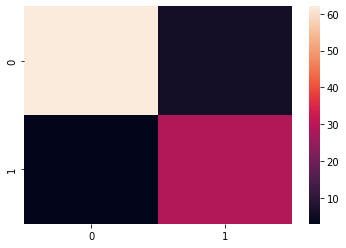

In [30]:
import seaborn as sns 
sns.heatmap(confusion_matrix(y_test, y_hat_pred))

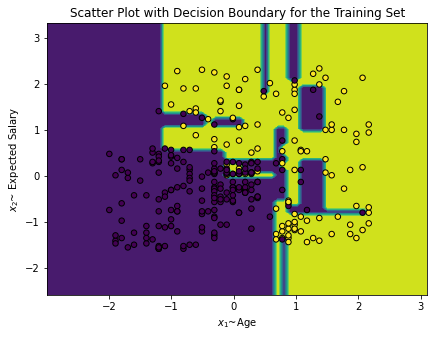

In [31]:
# plotting the decision boundary in the scatter plot of Training and Test Set with labels indicated by colors
x_min, x_max = x_train[:,0].min() - 1, x_train[:,0].max() + 1
y_min, y_max = x_train[:,1].min() - 1, x_train[:,1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = dtc.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(x_train[:,0], x_train[:,1], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('$x_1$~Age')
plt.ylabel('$x_2$~ Expected Salary')
plt.title('Scatter Plot with Decision Boundary for the Training Set')

plt.show()

# Random Forest Classification

In [41]:
df_rfc = df.copy()

In [42]:
df_rfc.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [43]:
x = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size=0.25)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rfc.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [46]:
y_hat_pred = rfc.predict(x_test)
y_hat_pred = y_hat_pred.reshape(len(y_hat_pred), 1)

In [47]:
np.concatenate((y_hat_pred, y_test), axis=1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0,

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_hat_pred))
print(accuracy_score(y_test, y_hat_pred))
# we predicted that 65 person did not buy the car.
# 25 person bought the car.
# 4 person did buy the car but our model predicted that they not.
# 2 person did not buy the car but our model predicted that they did.

[[63  5]
 [ 4 28]]
0.91


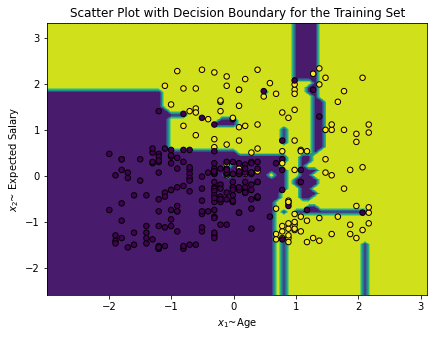

In [49]:
# plotting the decision boundary in the scatter plot of Training and Test Set with labels indicated by colors
x_min, x_max = x_train[:,0].min() - 1, x_train[:,0].max() + 1
y_min, y_max = x_train[:,1].min() - 1, x_train[:,1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = rfc.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(x_train[:,0], x_train[:,1], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('$x_1$~Age')
plt.ylabel('$x_2$~ Expected Salary')
plt.title('Scatter Plot with Decision Boundary for the Training Set')

plt.show()